<a href="https://colab.research.google.com/github/musfiqur552608/Bangla-Sentence-Classification/blob/master/Bangla_sentence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connect to google drive

In [ ]:
from  google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data Checking

In [ ]:
df.head(10)

,Context,Context_name,Class
0,তোমার নাম কি?,প্রশ্নবোধক বাক্য,0
1,তুমি কোথায় থাকো?,প্রশ্নবোধক বাক্য,0
2,তোমার বাবার নাম কি?,প্রশ্নবোধক বাক্য,0
3,তোমার মায়ের নাম কি?,প্রশ্নবোধক বাক্য,0
4,তোমরা কয় ভাই-বোন?,প্রশ্নবোধক বাক্য,0
5,তুমি কোন শ্রেণিতে পড়?,প্রশ্নবোধক বাক্য,0
6,কোনটি সবচেয়ে প্রাচীন সভ্যতা?,প্রশ্নবোধক বাক্য,0
7,ইতিহাসের প্রথম লিখিত আইন প্রণেতা কে?,প্রশ্নবোধক বাক্য,0
8,পৃথিবীর কোথায় প্রথম লিখিত আইনের প্রচলন হয়?,প্রশ্নবোধক বাক্য,0
9,সুমেরির সভ্যতা কোথায় গড়ে উঠেছিল?,প্রশ্নবোধক বাক্য,0


In [ ]:
df.tail(10)

,Context,Context_name,Class
8990,ইগুরাজু জলপ্রপাতের উচ্চতা কত?,প্রশ্নবোধক বাক্য,0
8991,ইগুরাজু জলপ্রপাত কোথায় অবস্থিত?,প্রশ্নবোধক বাক্য,0
8992,প্যাট্রিস ম্যারিবন্দো জলপ্রপাত থেকে গড়ে কী পরি...,প্রশ্নবোধক বাক্য,0
8993,প্যাট্রিস ম্যারিবন্দো জলপ্রপাতের উচ্চতা কত?,প্রশ্নবোধক বাক্য,0
8994,প্যাট্রিস ম্যারিবন্দো জলপ্রপাত কোথায় অবস্থিত?,প্রশ্নবোধক বাক্য,0
8995,কিং অষ্টম অ্যাডওয়ার্ড জলপ্রপাতের উচ্চতা কত?,প্রশ্নবোধক বাক্য,0
8996,কিং অষ্টম অ্যাডওয়ার্ড জলপ্রপাত কোথায় অবস্থিত?,প্রশ্নবোধক বাক্য,0
8997,সুদারল্যান্ড জলপ্রপাত কোথায় অবস্থিত?,প্রশ্নবোধক বাক্য,0
8998,ভিক্টোরিয়া জলপ্রপাতের অবস্থান কোথায়?,প্রশ্নবোধক বাক্য,0
8999,আপার ইয়োসেমাইট জলপ্রপাত কোথায় অবস্থিত?,প্রশ্নবোধক বাক্য,0


In [ ]:
df.isnull().sum()

Context         0
Context_name    0
Class           0
dtype: int64

In [ ]:
df['Context'].value_counts()

প্রতিটি দরপত্রেই এমন কিছু শর্ত জুড়ে দেওয়া হয়, যার ফলে সিএনএস ছাড়া অন্য কোনো প্রতিষ্ঠানের কাজ পাওয়ার সুযোগ থাকে না।    5
বাংলাদেশের স্বাস্থ্য খাত নিয়ে আলোচনা উঠলেই কমিউনিটি ক্লিনিককে বাদ দিয়ে সেই আলোচনা পূর্ণ হয় না।                        4
যাই হোক না কেন!                                                                                                       4
এসব তোহ গুগল করলেও পারা যায়!                                                                                          4
হায়! মানুষের মনে এতো বোকা বোকা প্রশ্ন আসে কিকরে!                                                                      4
                                                                                                                     ..
পোলিশ স্ট্রাইকার ভাঙলেন কিংবদন্তি জার্ড মুলারের ৪৯ বছরের পুরনো রেকর্ড।                                                1
হেলসিংকি কোন দেশের রাজধানী?                                                                                           1
বিশ্ববিদ্যালয়ের সভা, সেমিনার, বৈজ্ঞানিক 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

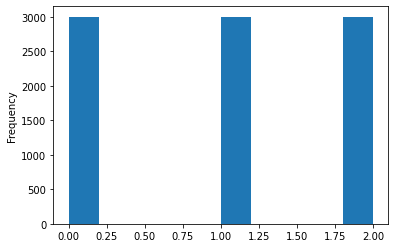

In [ ]:
df['Class'].plot(kind='hist')

In [ ]:
df['Length'] = df['Context'].str.split().apply(len)
df.head(20)

,Context,Context_name,Class,Length
0,তোমার নাম কি?,প্রশ্নবোধক বাক্য,0,3
1,তুমি কোথায় থাকো?,প্রশ্নবোধক বাক্য,0,3
2,তোমার বাবার নাম কি?,প্রশ্নবোধক বাক্য,0,4
3,তোমার মায়ের নাম কি?,প্রশ্নবোধক বাক্য,0,4
4,তোমরা কয় ভাই-বোন?,প্রশ্নবোধক বাক্য,0,3
5,তুমি কোন শ্রেণিতে পড়?,প্রশ্নবোধক বাক্য,0,4
6,কোনটি সবচেয়ে প্রাচীন সভ্যতা?,প্রশ্নবোধক বাক্য,0,4
7,ইতিহাসের প্রথম লিখিত আইন প্রণেতা কে?,প্রশ্নবোধক বাক্য,0,6
8,পৃথিবীর কোথায় প্রথম লিখিত আইনের প্রচলন হয়?,প্রশ্নবোধক বাক্য,0,7
9,সুমেরির সভ্যতা কোথায় গড়ে উঠেছিল?,প্রশ্নবোধক বাক্য,0,5


In [ ]:
df.Length.describe()

count    9000.000000
mean        7.103667
std         4.211097
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        89.000000
Name: Length, dtype: float64

In [ ]:
df.describe()

,Class,Length
count,9000.000000,9000.000000
mean,1.000000,7.103667
std,0.816542,4.211097
min,0.000000,1.000000
25%,0.000000,4.000000
50%,1.000000,6.000000
75%,2.000000,8.000000
max,2.000000,89.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Context       9000 non-null   object
 1   Context_name  9000 non-null   object
 2   Class         9000 non-null   int64 
 3   Length        9000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 281.4+ KB


# Punctuation Remove

In [ ]:
import string 
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [ ]:
x = df['Context'].fillna(' ')
y = df['Class']
print(x.head())
print(y.head())

0          তোমার নাম কি?
1       তুমি কোথায় থাকো?
2    তোমার বাবার নাম কি?
3    তোমার মায়ের নাম কি?
4      তোমরা কয় ভাই-বোন?
Name: Context, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [ ]:
x[1001]

'ট্রেন যথাসময়ে স্টেশনে পৌঁছালো।'

In [ ]:
x = df['Context'].apply(remove_punc)
x.shape

(9000,)

In [ ]:
x[1001]

'ট্রেন যথাসময়ে স্টেশনে পৌঁছালো।'

# Contractions

In [ ]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

# Main part

In [ ]:
import re
import string
from collections import Counter
vocab = Counter()
def clean_text(x,remove_stopwords = False):
    if True:
        new_text = []
        for word in x:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        x = "".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    x = re.sub(bangla_digits, " ", x)
    x = re.sub(punc, " ", x)
    x = re.sub(english_chars, " ", x)
    x = re.sub(bangla_fullstop, " ", x)
    x = re.sub(punctSeq, " ", x)
    x = whitespace.sub(" ", x).strip()
    
    x = re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)
    x = re.sub(r'\<a href', ' ', x)
    x = re.sub(r'&amp;‘:‘ ’', '', x) 
    x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', x)
    x = re.sub(r'<br />', ' ', x)
    x = re.sub(r'\'', ' ', x)
    x = re.sub(r"[\@$#%~+-\.\'।\"]"," ",x)
    x = re.sub(r"(?m)^\s+", "", x)
    x = re.sub("[()]","",x)
    x = re.sub("[‘’]","",x)
    x = re.sub("[!]","",x)
    x = re.sub("[/]","",x)
    x = re.sub("[:]","",x)
    x = re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',x)
    x = x.strip("/")
    
    if remove_stopwords:
        k = []
        with open('/content/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            x = [t for t in x if t not in k]
            x = "".join(x)
   

    return x

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [ ]:
vocab = CountVectorizer(analyzer=clean_text,encoding='utf-8').fit(x)

In [ ]:
print(len(vocab.vocabulary_))

72


In [ ]:
r0 = x[30]
print(r0)

কম্পিউটার একটি কি


In [ ]:
vocab0 = vocab.transform([r0])
print(vocab0)

  (0, 0)	2
  (0, 10)	1
  (0, 13)	1
  (0, 17)	3
  (0, 27)	2
  (0, 37)	1
  (0, 41)	1
  (0, 43)	1
  (0, 50)	1
  (0, 51)	3
  (0, 60)	1


In [ ]:
print(vocab.get_feature_names()[50])
print(vocab.get_feature_names()[50])

া
া


In [ ]:
x = vocab.transform(x)

In [ ]:
print("Shape of the sparse matrix: ", x.shape)
print("Non-Zero occurences: ",x.nnz)
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (7500, 72)
Non-Zero occurences:  142677
Density of the matrix =  26.421666666666667


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [ ]:
x_train

<6375x72 sparse matrix of type '<class 'numpy.int64'>'
	with 121254 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

6893    0
3164    2
2987    2
1991    0
6459    1
       ..
1050    0
6532    0
4181    0
2477    1
5299    2
Name: Class, Length: 6375, dtype: int64

In [ ]:
y_test

3555    1
1092    0
6218    1
2545    2
887     2
       ..
5611    1
4482    0
5619    1
3650    1
2882    2
Name: Class, Length: 1125, dtype: int64

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))


Confusion Matrix for Multinomial Naive Bayes:
[[247  56  55]
 [ 54 281  70]
 [ 67 120 175]]
Score: 62.49
Classification Report:               precision    recall  f1-score   support

           0       0.67      0.69      0.68       358
           1       0.61      0.69      0.65       405
           2       0.58      0.48      0.53       362

    accuracy                           0.62      1125
   macro avg       0.62      0.62      0.62      1125
weighted avg       0.62      0.62      0.62      1125



In [ ]:
acc1=metrics.accuracy_score(y_test, predmnb)
print("Accuracy:",acc1*100,"%")
cross_val_score(mnb, x, y, cv=10)
naive_cross_val=cross_val_score(mnb, x, y, cv=10).mean()
naive_cross_val

Accuracy: 62.488888888888894 %


0.5894666666666666

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[283  43  32]
 [ 28 332  45]
 [ 45  84 233]]
Score: 75.38
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79       358
           1       0.72      0.82      0.77       405
           2       0.75      0.64      0.69       362

    accuracy                           0.75      1125
   macro avg       0.76      0.75      0.75      1125
weighted avg       0.76      0.75      0.75      1125



In [ ]:
acc2=metrics.accuracy_score(y_test,predrmfr)
print("Accuracy:",acc2*100,"%")
cross_val_score(rmfr, x, y, cv=10)
rmfr_cross_val=cross_val_score(rmfr, x, y, cv=10).mean()
rmfr_cross_val

Accuracy: 75.37777777777778 %


0.7392

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[331  81  76]
 [ 87 342 109]
 [ 91 108 275]]
Score: 63.2
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.68      0.66       488
           1       0.64      0.64      0.64       538
           2       0.60      0.58      0.59       474

    accuracy                           0.63      1500
   macro avg       0.63      0.63      0.63      1500
weighted avg       0.63      0.63      0.63      1500



In [ ]:

acc3=metrics.accuracy_score(y_test,preddt)
print("Accuracy:",acc3*100,"%")
cross_val_score(dt, x, y, cv=10)
dt_cross_val=cross_val_score(dt, x, y, cv=10).mean()
dt_cross_val


Accuracy: 63.2 %


0.6325333333333335

# SVC

In [ ]:

from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[359  82  47]
 [ 63 424  51]
 [ 64  93 317]]
Score: 73.33
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.74      0.74       488
           1       0.71      0.79      0.75       538
           2       0.76      0.67      0.71       474

    accuracy                           0.73      1500
   macro avg       0.74      0.73      0.73      1500
weighted avg       0.74      0.73      0.73      1500



In [ ]:
import pickle
acc4=metrics.accuracy_score(y_test,predsvm)
print("Accuracy:",acc4*100,"%")
cross_val_score(svm, x, y, cv=10)
naive_cross_val=cross_val_score(svm, x, y, cv=10).mean()
naive_cross_val

Accuracy: 72.86666666666667 %


0.7177333333333333

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[383  70  30]
 [112 352  55]
 [159  89 250]]
Score:  65.67
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.79      0.67       483
           1       0.69      0.68      0.68       519
           2       0.75      0.50      0.60       498

    accuracy                           0.66      1500
   macro avg       0.67      0.66      0.65      1500
weighted avg       0.67      0.66      0.65      1500



In [ ]:
acc5=metrics.accuracy_score(y_test,predknn)
print("Accuracy:",acc5*100,"%")
cross_val_score(knn, x, y, cv=10)
knn_cross_val=cross_val_score(knn, x, y, cv=10).mean()
knn_cross_val

Accuracy: 65.66666666666666 %


0.632

# XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for xgboost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for xgboost Classifier:
[[370  70  43]
 [ 52 398  69]
 [ 79  92 327]]
Score:  73.0
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       483
           1       0.71      0.77      0.74       519
           2       0.74      0.66      0.70       498

    accuracy                           0.73      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.73      0.73      1500



In [ ]:
acc6=metrics.accuracy_score(y_test,predxgb)
print("Accuracy:",acc6*100,"%")
cross_val_score(xgb, x, y, cv=10)
xgb_cross_val=cross_val_score(xgb, x, y, cv=10).mean()
xgb_cross_val

Accuracy: 73.0 %


0.7085333333333333

# Graph

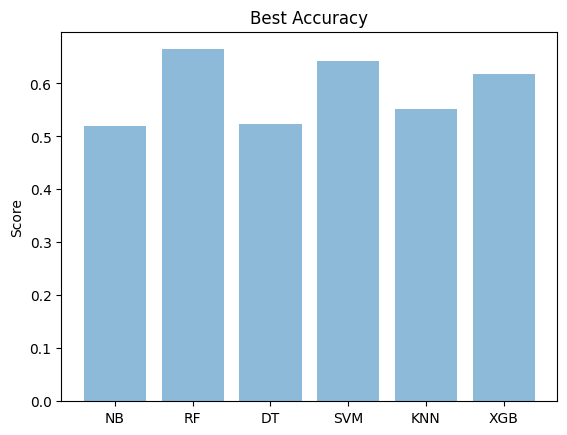

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('NB','RF','DT','SVM','KNN','XGB')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4,acc5,acc6]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')

plt.show()

In [ ]:
headline=input()
prt=vocab.transform([headline])

1


In [ ]:
m1=svm.predict(prt)
print("Predicted Rating:",m1)
if m1==0:
  print("Interogartive")
elif m1==1:
  print("Exclamatory")
else:
  print("Assertive")

Predicted Rating: [1]
Exclamatory


In [ ]:
m2=knn.predict(prt)
print("Predicted Rating:",m2)
if m2==0:
  print("Interogartive")
elif m2==1:
  print("Exclamatory")
else:
  print("Assertive")

Predicted Rating: [2]
Negative


In [ ]:
m3=dt.predict(prt)
print("Predicted Rating:",m3)
if m3==0:
  print("Interogartive")
elif m3==1:
  print("Exclamatory")
else:
  print("Assertive")

Predicted Rating: [3]
Assertive


In [ ]:
m4=mnb.predict(prt)
print("Predicted Rating:",m4)
if m4==0:
  print("Interogartive")
elif m4==1:
  print("Exclamatory")
else:
  print("Assertive")

Predicted Rating: [1]
Exclamatory


In [ ]:
m5=rmfr.predict(prt)
print("Predicted Rating:",m5)
if m5==0:
  print("Interogartive")
elif m5==1:
  print("Exclamatory")
else:
  print("Assertive")

Predicted Rating: [3]
Assertive


In [ ]:
m6=xgb.predict(prt)
print("Predicted Rating:",m6)
if m6==0:
  print("Interogartive")
elif m6==1:
  print("Exclamatory")
else:
  print("Assertive")

Predicted Rating: [1]
Exclamatory
